In [1]:
import pandas as pd
import numpy as np

Data = pd.read_csv("data.csv", encoding = "UTF-8")
ar=np.array(Data.values) 
print("\'%s\' to \'%s\'" %(min(ar[:,2]),max(ar[:,2])))

'2019-01-20' to '2019-03-01'


In [2]:
gp=Data.groupby('dt')
gp['phone_no'].count().reset_index(name='# of orders')

,dt,# of orders
0,2019-01-20,69859
1,2019-01-21,117686
2,2019-01-22,118409
3,2019-01-23,126331
4,2019-01-24,125764
5,2019-01-25,122092
6,2019-01-26,77779
7,2019-01-27,66399
8,2019-01-28,106025
9,2019-01-29,104704


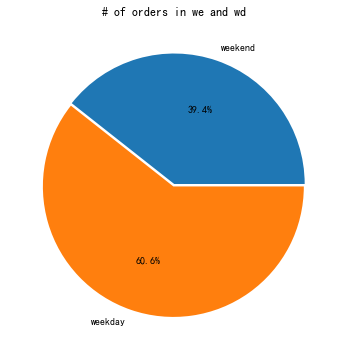

In [4]:
gp1=gp['phone_no'].count().reset_index(name='# of orders')
ar1=np.array(gp1) 
weekday=[]
weekend=[]
i=0
while (i<=40):
    if i%7==6 or i%7==0:
        weekend.append(ar1[i][1])
    else:
        weekday.append(ar1[i][1])
    i=i+1
    

from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.figure(figsize=(6,6))
label=['weekend','weekday']
explode=[0.01,0.01]
values=[np.mean(weekend),np.mean(weekday)]
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')
plt.title('# of orders in we and wd')
plt.savefig('./周末周日销量图')
plt.show()


In [5]:
ar2=np.array(Data.values) 
set1=set(ar2[:,3])
print(len(set1))


466886


In [6]:
gp2=Data.groupby('commodity_name')
gp3=gp2['phone_no'].count().reset_index(name='# of orders')
print(gp3.sort_values(by='# of orders',ascending= False)[0:10],'\n')

   commodity_name  # of orders
25             拿铁       425514
32           榛果拿铁       219627
35            澳瑞白       155506
30           标准美式       148666
67           香草拿铁       136841
7            卡布奇诺       115475
27             摩卡       113754
6            加浓美式       110526
44          焦糖玛奇朵       105081
42           焦糖拿铁        81120 



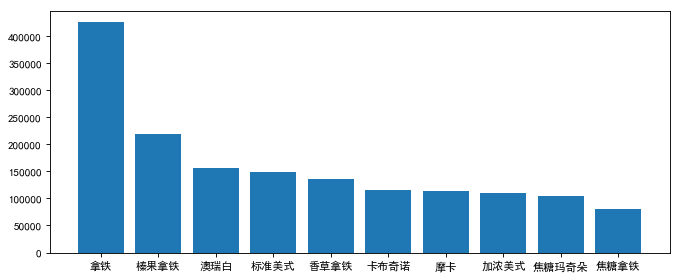

In [7]:
gp4=gp3.sort_values(by='# of orders',ascending= False)[0:10]
ar3=np.array(gp4)
Index=ar3[:,0]
Values=ar3[:,1]
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize =(10,4), dpi = 80)
plt.bar(Index, Values)
plt.show()

In [8]:
A = pd.read_csv("data.csv", encoding = "UTF-8",  usecols = [7]) 
B = pd.read_csv("data.csv", encoding = "UTF-8",  usecols = [12]) 
C = round(B['commodity_income'] / A['commodity_origin_money'],2)
#del(Data['discount_rate'])
Data['discount_rate']= C

print(Data.values[1:10])

[[1 1 '2019-01-27' 13901387938 14442 'SP209' 'NFC鲜榨橙汁' 24.0 nan 0.0 '饮品'
  '鲜榨果蔬汁' 0.0 0.0 0.0 0.0]
 [2 2 '2019-01-23' 13901387938 14442 'SP025' '榛果拿铁' 27.0 5589.0 22.14
  '饮品' '现磨咖啡' 4.86 4.86 0.0 0.18]
 [3 3 '2019-02-01' 13901387938 14442 'SP025' '榛果拿铁' 27.0 6604.0 19.44
  '饮品' '现磨咖啡' 7.56 7.56 0.0 0.28]
 [4 4 '2019-01-27' 13901387938 14442 'SP010' '巧克力瑞纳冰' 27.0 6947.0 14.04
  '饮品' '瑞纳冰' 12.96 12.96 0.0 0.48]
 [5 5 '2019-02-03' 13901387938 14442 'SP023' '香草拿铁' 27.0 6604.0 19.44
  '饮品' '现磨咖啡' 7.56 7.56 0.0 0.28]
 [6 6 '2019-01-24' 13901387938 14442 'SP008' '拿铁' 24.0 7038.0 17.28 '饮品'
  '现磨咖啡' 6.72 6.72 0.0 0.28]
 [7 7 '2019-02-02' 13901387938 14442 'SP209' 'NFC鲜榨橙汁' 24.0 5664.0 14.88
  '饮品' '鲜榨果蔬汁' 9.12 9.12 0.0 0.38]
 [8 8 '2019-02-02' 13901387938 14442 'SP344' '加浓美式' 24.0 6604.0 17.28
  '饮品' '现磨咖啡' 6.72 6.72 0.0 0.28]
 [9 9 '2019-01-24' 17710179294 16404 'SP029' '焦糖拿铁' 27.0 nan 0.0 '饮品'
  '现磨咖啡' 9.0 0.0 9.0 0.33]]


In [9]:
weeks=[]
i=1
j=1
while (j<=6):
    while (i<=7):
        weeks.append('week' + str(j))
        i=i+1
    j=j+1
    i=1
del(weeks[-1])
weeks

discount_rate=np.array(gp['discount_rate'].mean())
df = pd.DataFrame({'weeks':weeks,
                  'avg_discount_rate':discount_rate,
                 })
df.groupby('weeks').mean()


,avg_discount_rate
weeks,
week1,0.396294
week2,0.416086
week3,0.376558
week4,0.471650
week5,0.489570
week6,0.488210


In [10]:
user_1_20=Data[Data['dt']=='2019-01-20']['phone_no']
user_1_21=Data[Data['dt']=='2019-01-21']['phone_no']
user_1_22=Data[Data['dt']=='2019-01-22']['phone_no']
user_1_23=Data[Data['dt']=='2019-01-23']['phone_no']
user_1_24=Data[Data['dt']=='2019-01-24']['phone_no']
user_1_25=Data[Data['dt']=='2019-01-25']['phone_no']
list1=sorted(set(user_1_20)) 
list2=sorted(set(user_1_21))
list3=sorted(set(user_1_22))
list4=sorted(set(user_1_23))
list5=sorted(set(user_1_24))
list6=sorted(set(user_1_25))
a = pd.DataFrame(list1, columns = ['1-20'])
b = pd.DataFrame(list2, columns = ['1-21'])
c = pd.DataFrame(list3, columns = ['1-22'])
d = pd.DataFrame(list4, columns = ['1-23'])
e = pd.DataFrame(list5, columns = ['1-24'])
rr_1=len(a['1-20'].loc[a['1-20'].isin(list2)]) / len(a)
rr_2=len(b['1-21'].loc[b['1-21'].isin(list3)]) / len(b)
rr_3=len(c['1-22'].loc[c['1-22'].isin(list4)]) / len(c)
rr_4=len(d['1-23'].loc[d['1-23'].isin(list5)]) / len(d)
rr_5=len(e['1-24'].loc[e['1-24'].isin(list6)]) / len(e)
retention_rate=pd.DataFrame([rr_1,rr_2,rr_3,rr_4,rr_5])
retention_rate.columns = ['retention_rate']
retention_rate.index=['2019-01-20','2019-01-21','2019-01-22','2019-01-23','2019-01-24']
retention_rate

,retention_rate
2019-01-20,0.152319
2019-01-21,0.246349
2019-01-22,0.235294
2019-01-23,0.227760
2019-01-24,0.220983


In [11]:
user_1_26=Data[Data['dt']=='2019-01-26']['phone_no']
user_1_27=Data[Data['dt']=='2019-01-27']['phone_no']
list7=sorted(set(user_1_26))
list8=sorted(set(user_1_27))
list9=[]
list9.extend(list2)
list9.extend(list3)
list9.extend(list4)
list9.extend(list5)
list9.extend(list6)
list9.extend(list7)
list9.extend(list8)
list10 = sorted(set(list9))


a = pd.DataFrame(list1, columns = ['1-20'])
week_rr = a['1-20'].loc[a['1-20'].isin(list10)]


week_retention_rate=pd.DataFrame([len(week_rr) / len(a)])
week_retention_rate.columns = ['week_retention_rate']
week_retention_rate.index=['2019-01-20']
week_retention_rate

,week_retention_rate
2019-01-20,0.51082


In [12]:
user_1_28=Data[Data['dt']=='2019-01-28']['phone_no']
list11=sorted(set(user_1_28))

a['1-20'].loc[a['1-20'].isin(list2)]


b = pd.DataFrame(list2, columns = ['1-21'])
b_0 = pd.DataFrame(b['1-21'].loc[~b['1-21'].isin(list1)],columns = ['1-21'])
list12=[]

list12.extend(list3)
list12.extend(list4)
list12.extend(list5)
list12.extend(list6)
list12.extend(list7)
list12.extend(list8)
list12.extend(list11)
list13 = sorted(set(list12))
nu_week_rr = b_0['1-21'].loc[b_0['1-21'].isin(list13)]
nu_week_retention_rate=pd.DataFrame([len(nu_week_rr) / len(b_0)])
nu_week_retention_rate.columns = ['nu_week_retention_rate']
nu_week_retention_rate.index=['2019-01-21']
nu_week_retention_rate

,nu_week_retention_rate
2019-01-21,0.602589


In [13]:
user_week1=[]
user_week1.extend(list1)
user_week1.extend(list2)
user_week1.extend(list3)
user_week1.extend(list4)
user_week1.extend(list5)
user_week1.extend(list6)
user_week1.extend(list7)


counter=0
buyer_1=sorted(set(user_week1))
len(buyer_1)
for item in buyer_1:
    if user_week1.count(item)>=2:
        counter=counter+1
        

ww_retention_rate=counter/len(buyer_1)
ww_retention_rate

0.3224008359510723

In [14]:
active_user_0=Data['phone_no'].value_counts()
active_user = active_user_0[active_user_0>=5]
au_0 = {'phone_no':active_user.index,'# of order':active_user.values}
au = pd.DataFrame(au_0)
au

,phone_no,# of order
0,17739280725,585
1,15901372718,300
2,13350593820,262
3,15051848332,186
4,18612964618,170
5,18691562111,164
6,18936033090,164
7,18659201826,159
8,15810257089,153
9,17726035219,146


In [15]:
import os  
os.getcwd()
au.to_csv('ActiveUser.csv')

In [16]:
activeUser_no=round(len(active_user),1)
order_no = np.array(au['# of order'])
mean = np.mean(order_no)
np.max(order_no)
np.min(order_no)
std = np.std(order_no, ddof = 1)
var = std**2
s = pd.Series(order_no)
skew = s.skew()
kurt = s.kurt()
onn=pd.DataFrame([activeUser_no,mean,np.max(order_no),np.min(order_no),std,var,skew,kurt])
#retention_rate.columns = ['retention_rate']
onn.index=['# of ActiveUser','mean','max','min','std','var','skew','kurt']
onn.round(2)

,0
# of ActiveUser,166308.00
mean,10.42
max,585.00
min,5.00
std,7.60
var,57.75
skew,6.54
kurt,241.36


In [17]:
Data.drop(columns = 'Unnamed: 0', inplace = True) 
Data

,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48
5,5,2019-02-03,13901387938,14442,SP023,香草拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
6,6,2019-01-24,13901387938,14442,SP008,拿铁,24.0,7038.0,17.28,饮品,现磨咖啡,6.72,6.72,0.0,0.28
7,7,2019-02-02,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,5664.0,14.88,饮品,鲜榨果蔬汁,9.12,9.12,0.0,0.38
8,8,2019-02-02,13901387938,14442,SP344,加浓美式,24.0,6604.0,17.28,饮品,现磨咖啡,6.72,6.72,0.0,0.28
9,9,2019-01-24,17710179294,16404,SP029,焦糖拿铁,27.0,NaN,0.00,饮品,现磨咖啡,9.00,0.00,9.0,0.33
